In [6]:
# MSRP Price Category Classification
# This notebook reads a car dataset and creates a new column categorizing MSRP into Low, Medium, and High price categories

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## Task1

1.The dataset contains a column MSRP (Manufacturer's Suggested Retail Price), which represents the price of the car. Create a new column Price Category that categorizes the MSRP values into three categories:

* Low: MSRP less than 20,000
* Medium: MSRP between 20,000 and 40,000
* High: MSRP greater than 40,000

In [2]:
# Read the CSV file
df = pd.read_csv('dataset_da_assignm3.csv')

# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
df.head()

# Check basic information about the dataset
print("\nDataset Information:")
df.info()

# Check for missing values in the MSRP column
print("\nMissing Values in MSRP column:", df['MSRP'].isna().sum())

Dataset Preview:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-nu

In [3]:
# Get summary statistics of the MSRP column
print("\nMSRP Summary Statistics:")
df['MSRP'].describe()

# Create a new column 'Price Category' that categorizes MSRP into Low, Medium, and High
def categorize_price(msrp):
    if msrp < 20000:
        return 'Low'
    elif 20000 <= msrp <= 40000:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create the new column
df['Price Category'] = df['MSRP'].apply(categorize_price)

# Display the first few rows with the new column
print("\nDataset with Price Category column:")
df.head()

# Check the distribution of Price Categories
price_category_counts = df['Price Category'].value_counts()
print("\nPrice Category Distribution:")
print(price_category_counts)


MSRP Summary Statistics:

Dataset with Price Category column:

Price Category Distribution:
Price Category
Medium    5838
High      3367
Low       2709
Name: count, dtype: int64


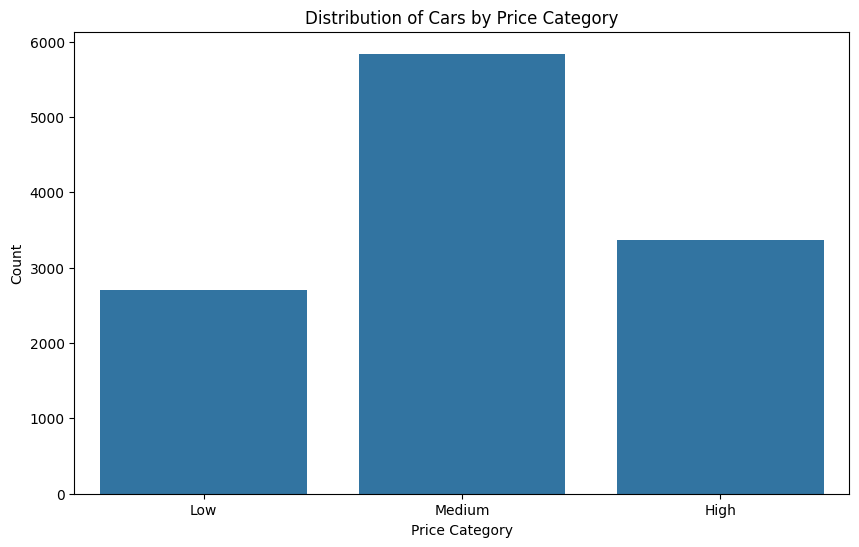

In [4]:
# Visualize the distribution of Price Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Price Category', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Cars by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

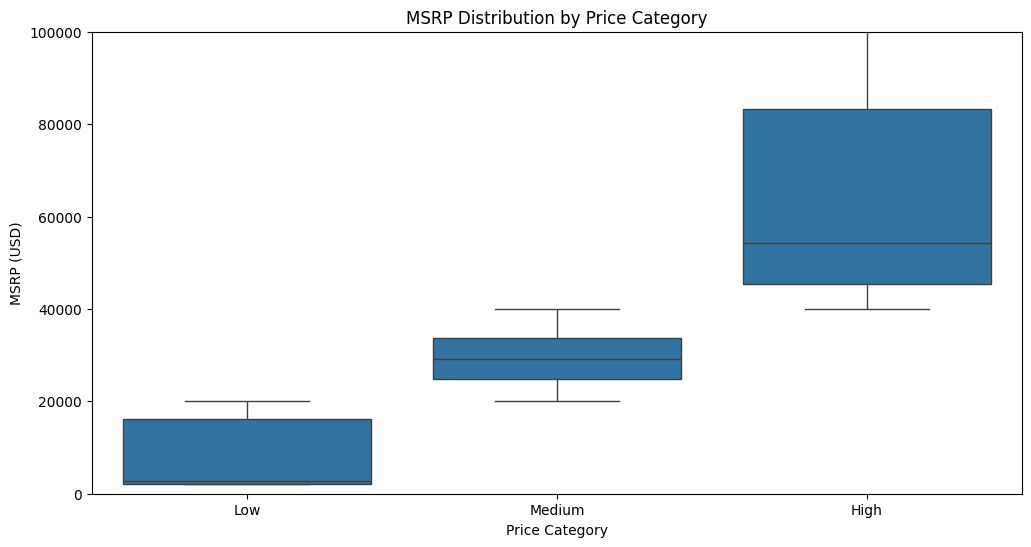

In [5]:
# Visualize MSRP distribution by Price Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price Category', y='MSRP', data=df, order=['Low', 'Medium', 'High'])
plt.title('MSRP Distribution by Price Category')
plt.xlabel('Price Category')
plt.ylabel('MSRP (USD)')
plt.ylim(0, 100000)  # Setting a limit to better visualize the distribution
plt.show()

## Task 2

2.The dataset contains several columns, including Make, Engine HP, and MSRP. Perform a group-by aggregation on the Make column. For each make, calculate the following:
* The average Engine HP
* The total MSRP across all cars for that make

In [7]:
# Check data types to ensure numeric calculations will work
print("\nData types:")
print(df[['Make', 'Engine HP', 'MSRP']].dtypes)

# Clean the data by removing rows with missing Engine HP or MSRP values
df_clean = df.dropna(subset=['Engine HP', 'MSRP'])
print(f"\nRemoved {df.shape[0] - df_clean.shape[0]} rows with missing values")


Data types:
Make          object
Engine HP    float64
MSRP           int64
dtype: object

Removed 69 rows with missing values


In [8]:
# Perform the group-by aggregation on the Make column
# Calculate average Engine HP and total MSRP for each make
make_aggregation = df_clean.groupby('Make').agg({
    'Engine HP': 'mean',
    'MSRP': 'sum'
})

# Rename columns for clarity
make_aggregation.columns = ['Average Engine HP', 'Total MSRP']

# Add a count of cars per make for reference
make_aggregation['Car Count'] = df_clean.groupby('Make').size()

# Sort results alphabetically by Make
make_aggregation = make_aggregation.sort_index()

# Display the first 10 rows of the aggregated data
print("\nFirst 10 rows of aggregated data:")
make_aggregation.head(10)


First 10 rows of aggregated data:


,Average Engine HP,Total MSRP,Car Count
Make,,,
Acura,244.797619,8791672,252
Alfa Romeo,237.000000,308000,5
Aston Martin,484.322581,18405665,93
Audi,277.695122,17532293,328
BMW,326.907186,20556619,334
Bentley,533.851351,18290530,74
Bugatti,1001.000000,5271671,3
Buick,219.244898,5528496,196
Cadillac,332.309824,22323833,397


In [9]:
# Find makes with the highest average Engine HP and highest total MSRP
highest_avg_hp = make_aggregation['Average Engine HP'].idxmax()
highest_total_msrp = make_aggregation['Total MSRP'].idxmax()

print(f"\nMake with highest average Engine HP: {highest_avg_hp} with {make_aggregation.loc[highest_avg_hp, 'Average Engine HP']:.2f} HP")
print(f"Make with highest total MSRP: {highest_total_msrp} with ${make_aggregation.loc[highest_total_msrp, 'Total MSRP']:,.2f}")


Make with highest average Engine HP: Bugatti with 1001.00 HP
Make with highest total MSRP: Chevrolet with $31,602,318.00


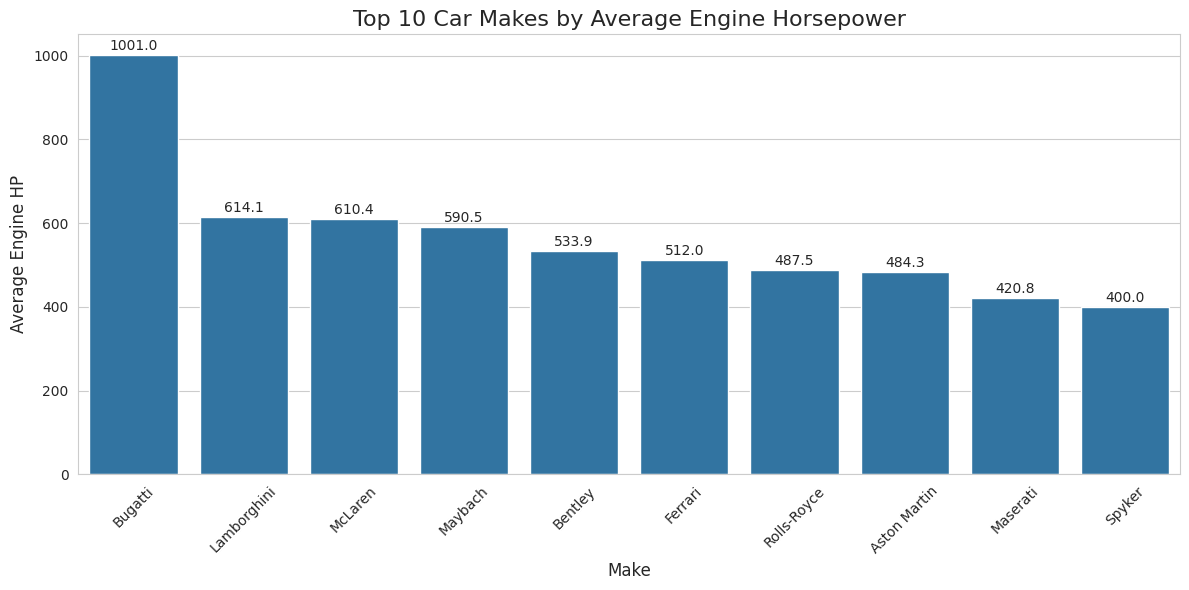

In [10]:
# Visualize the results

# 1. Top 10 makes by average Engine HP
top_hp = make_aggregation.sort_values('Average Engine HP', ascending=False).head(10)
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=top_hp.index, y='Average Engine HP', data=top_hp)
plt.title('Top 10 Car Makes by Average Engine Horsepower', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Average Engine HP', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels on top of each bar
for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width()/2., 
              bar.get_height() + 5,
              f'{bar.get_height():.1f}',
              ha='center', va='bottom')
    
plt.show()

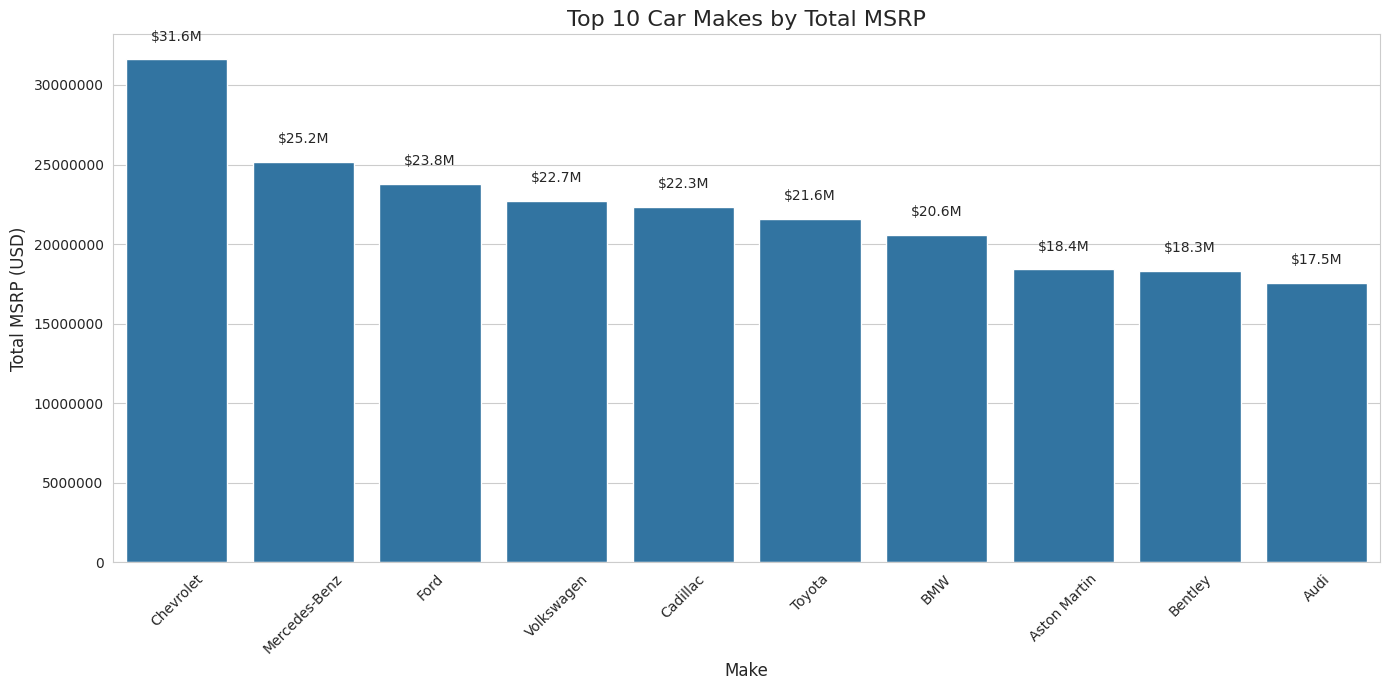

In [11]:
# 2. Top 10 makes by total MSRP
top_msrp = make_aggregation.sort_values('Total MSRP', ascending=False).head(10)
plt.figure(figsize=(14, 7))
bars = sns.barplot(x=top_msrp.index, y='Total MSRP', data=top_msrp)
plt.title('Top 10 Car Makes by Total MSRP', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Total MSRP (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

# Add value labels on top of each bar (formatted as millions)
for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width()/2., 
              bar.get_height() + 1000000,
              f'${bar.get_height()/1000000:.1f}M',
              ha='center', va='bottom')
    
plt.show()

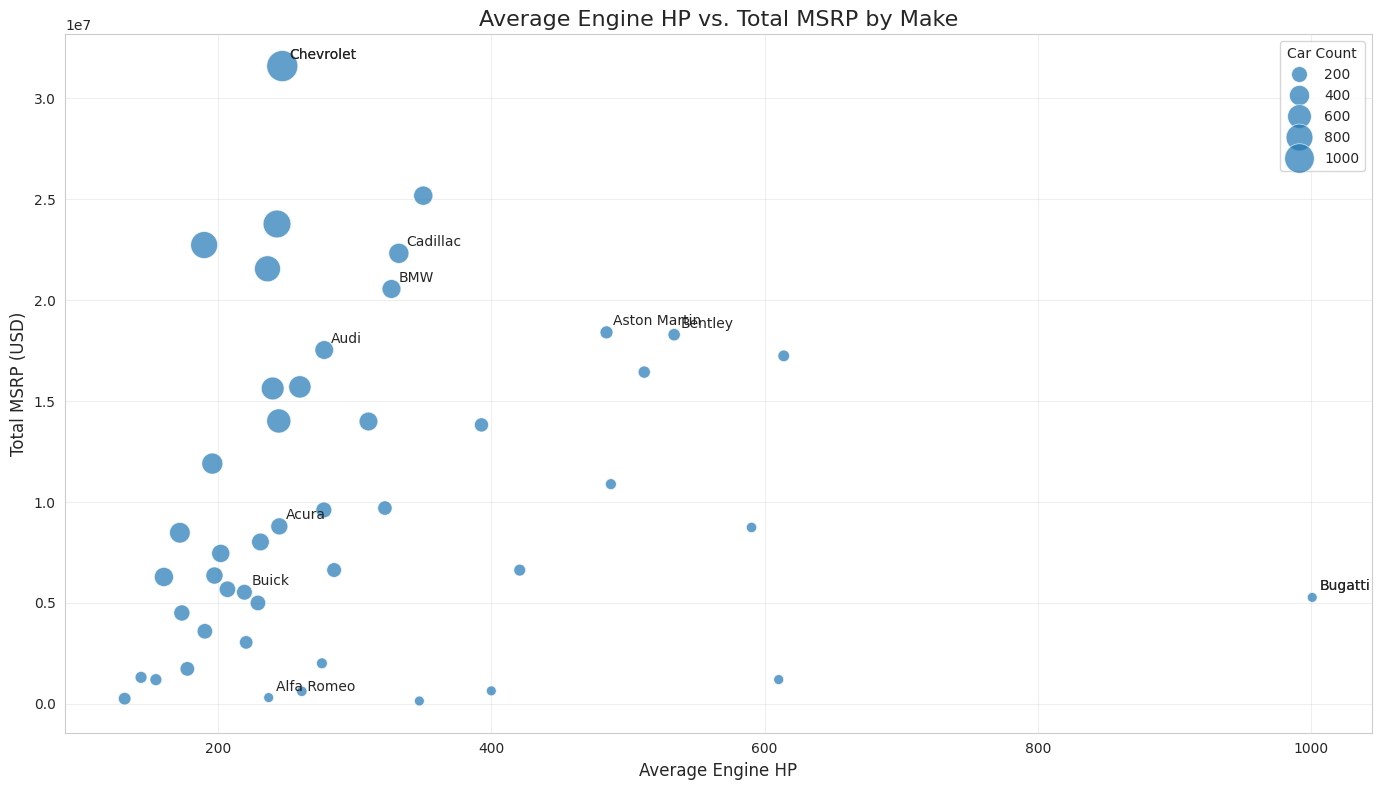

In [12]:
# 3. Scatter plot of Average Engine HP vs. Total MSRP (excluding outliers for better visualization)
plt.figure(figsize=(14, 8))
sns.scatterplot(data=make_aggregation, x='Average Engine HP', y='Total MSRP', 
                size='Car Count', sizes=(50, 500), alpha=0.7)

# Annotate interesting points (top makes)
for make in make_aggregation.index[:10]:  # Annotate first 10 alphabetically
    x = make_aggregation.loc[make, 'Average Engine HP']
    y = make_aggregation.loc[make, 'Total MSRP']
    plt.annotate(make, (x, y), xytext=(5, 5), textcoords='offset points')

# Also annotate the notable outliers/top performers
for make in [highest_avg_hp, highest_total_msrp]:
    x = make_aggregation.loc[make, 'Average Engine HP']
    y = make_aggregation.loc[make, 'Total MSRP']
    plt.annotate(make, (x, y), xytext=(5, 5), textcoords='offset points')

plt.title('Average Engine HP vs. Total MSRP by Make', fontsize=16)
plt.xlabel('Average Engine HP', fontsize=12)
plt.ylabel('Total MSRP (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Task 3

3. The dataset contains numerical columns Engine HP and MSRP. Perform the following statistical
analysis:
* Calculate the correlation between Engine HP and MSRP to determine how strongly these two variables are related.
* Calculate the standard deviation of the MSRP column to understand the variation in car prices.
* Explain statistically what the results mean.